# **Explorations in Etymology: Data Analysis and Prediction**
## Fall 2024 Data Science Project
*George Mills; Azhan Zafar; Elizabeth Casey; Aybars Kocoglu; Connor Owens; Maximilian Hollis*

# Contributions
A: Project idea
	Everyone contributed to selecting the project idea.

B: Dataset Curation and Preprocessing
	Elizabeth found the etymology dataset and Aybars found the word frequency dataset. Aybars worked on the preprocessing of these datasets. 

C: Data Exploration and Summary Statistics
	Aybars and Azhan worked on testing and creating visualizations for Hypothesis 1, Connor and Elizabeth worked on testing and creating visualizations for Hypothesis 2, and George and Max worked on testing and creating visualizations for Hypothesis 3. 

D: ML Algorithm Design/Development
	Aybars developed and trained the basic models for K-Fold Cross Validation, the FNN, and the RNN and created rudimentary encodings for the training and test data.

E: ML Algorithm Training and Test Data Analysis
	Azhan and George worked on optimizing results by modifying input data.

F: Visualization, Result Analysis, Conclusion
	Max worked on visualizing the results of the ML analysis. 
	

G: Final Tutorial Report Creation
	Connor and Elizabeth wrote up and formatted the tutorial and Max hosted the site on GitHub.





# Introduction 

Our project is based on etymology. Etymology is defined as the study of the origin of words. This means how language and words change throughout history. The purpose of this project is to find relationships between the orgins of words and the languages that the words come from. Some questions we will try to answer in this project are can we predict the language or group of languages an english word may orginiate from? Is there a correlation between the frequency of words and the number of relationships that word has with other languages? Can we predict the region in which a given english word is from? Do the relationship types that appear in the words form a uniform distribution? By using statistical methods and machine learning techniques we learned in class we may be able to shed light on many of these questions and reveal new questions to be investigated in the future. 

This is important as we analyze the patterns in how words have evolved over time, we can discover how major languages have spread and influenced language around the world throughout history. The project will help us also learn more about how new words emerge as a response to major events, technological changes, and societal changes. We also aim to highlight the interconnectedness of language and geography throughout the world. The information we gain from this could also in the future be used as a resource for NLP (Natural Lanugage Processing), improving machine translation, and the creation of multilingual applications. 

# Initial Exploration / Data Collection + Pre-processing 



We sought to look for a dataset that was mostly clean, had enough data, and is informative enough to extrapolate information from. This is to to minimize data pre-processing and maximize our accuracy in later machine learning analyses. We found such a dataset on the Kaggle website https://www.kaggle.com/datasets/bilalelebi/dataset?select=etymology.csv. The etymology dataset has almost four million entries of words, the term column tells us the word, the lang column tells us the language that word belongs to, the related_term column tells us what term is closesly related to the word in that entry, the related_lang column tells us the language in which the related word for that word is from, and the reltype column tells us the type of relationship that word has with its related_term. 

Another dataset we used to factor in word frequencies is the unigram_freq dataset https://www.kaggle.com/datasets/rtatman/english-word-frequency. This dataset contains the top 333,333 most used words in the english language, created from the Google Word Trillion Word Corpus. This dataset allows us to incorporate the frequency of a word into our below analyses and extrapolate trends or relationships of words and languages based on the frequency of the word. 

In this section of the notebook we explore and clean the dataset by looking at all of the features in each dataset and determine the features that are most relevant to our questions. We extrapolate information like, all unique relationship types, the number of times each language is borrowed with respect to english words. In this section we also add visualizations and the creation of more features and dataframes that contain more informative values. 

This section is meant to help us understand the datasets initially and determine if there are any other questions that arise from our exploration and manipulation of the data. This section also compiles the data from the two datasets to create a dataframe that contains information from both while removing useless features, giving us a dataframe that will be extemely helpful in answering our questions. 

***Importing data processing libraries and plotting tools, reading in and displaying the raw etymology data.***

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')
display(etymology)

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
0,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,group_derived_root,NaN,NaN,NaN,0,0IIU6TlkSA2D7dg1PfxGOw,NaN,NaN
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
2,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,1.0
3,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,doublet_with,sqiifJX3XIOQ0vZ0trzRaA,English,treasure,0,NaN,NaN,NaN
4,iwDzanYmWxaUKbOlUy2yyQ,Latin,thesaurus,derived_from,7Rf1835bWYmlH9VnyYVbpg,Ancient Greek,θησαυρός,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
3884332,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,AUIYyyL0V_2rTzbDwWeVig,Danish,Bøll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,0.0
3884333,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,_zZUp3xTUyyi8TrPVMfOUw,German,Böll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,1.0
3884334,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,QLqQUWCoUu6hQGr40QVQyw,South Levantine Arabic,بـ,0,NaN,NaN,NaN
3884335,s0ANGE2hXn6nen8AFLynOg,South Levantine Arabic,بالمية,has_affix,sVDOI8DxUwq2DD03Y3HGdw,South Levantine Arabic,الميّة,1,NaN,NaN,NaN


***The raw features in the etymology dataset.***

In [15]:
etymology.columns

Index(['term_id', 'lang', 'term', 'reltype', 'related_term_id', 'related_lang',
       'related_term', 'position', 'group_tag', 'parent_tag',
       'parent_position'],
      dtype='object')

***Create dataframe to capture all words from the english language and drop columns that we do not use.***

In [16]:
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
display(engl)

,term,reltype,related_lang,related_term
0,thesaurus,group_derived_root,NaN,NaN
1,thesaurus,borrowed_from,Latin,thēsaurus
2,thesaurus,derived_from,Ancient Greek,θησαυρός
3,thesaurus,doublet_with,English,treasure
5,portmanteau,has_root,Proto-Indo-European,*per- (fare)
...,...,...,...,...
3884219,Halloweek,blend_of,English,week
3884331,Boell,group_related_root,NaN,NaN
3884332,Boell,borrowed_from,Danish,Bøll
3884333,Boell,borrowed_from,German,Böll


***Find all types of relationships between words.***

In [17]:
engl['related_lang'].value_counts().median()
engl['reltype'].unique()

array(['group_derived_root', 'borrowed_from', 'derived_from',
       'doublet_with', 'has_root', 'group_affix_root',
       'etymologically_related_to', 'group_related_root',
       'inherited_from', 'cognate_of', 'abbreviation_of', 'clipping_of',
       'has_affix', 'is_onomatopoeic', 'compound_of',
       'has_prefix_with_root', 'has_suffix', 'has_confix', 'calque_of',
       'blend_of', 'has_prefix', 'back-formation_from',
       'learned_borrowing_from', 'unadapted_borrowing_from',
       'named_after', 'orthographic_borrowing_from', 'semantic_loan_of',
       'initialism_of', 'phono-semantic_matching_of',
       'semi_learned_borrowing_from'], dtype=object)

***Find how many times each language is borrowed from english words, create an other category for languages that are borrowed from a lot less.***

In [18]:
# (engl['related_lang'] != 'English')
related_counts = engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()
piechart_lst = related_counts[related_counts >= 150]
other = pd.Series({'Other': engl[(engl['reltype'] == 'borrowed_from')]['related_lang'].value_counts()[engl['related_lang'].value_counts() < 150].sum()})
piechart_series = pd.concat([piechart_lst, other])
piechart_series

French            4499
Latin             3504
Italian           2236
Spanish           2094
German            2056
Japanese          1840
Ancient Greek     1025
Arabic             758
Middle French      673
Russian            634
Polish             537
Hindi              508
Dutch              429
Sanskrit           417
Portuguese         317
Hebrew             309
New Latin          265
Late Latin         248
Swedish            220
Irish              209
Persian            196
Afrikaans          191
Yiddish            186
Medieval Latin     182
Korean             181
Greek              170
Armenian           158
Malay              155
Vietnamese         152
Other             2616
dtype: int64

***Plot the frequencies of borrowed languages as a pie chart.***

<Axes: title={'center': 'Number of English Words Borrowed from Each Language'}>

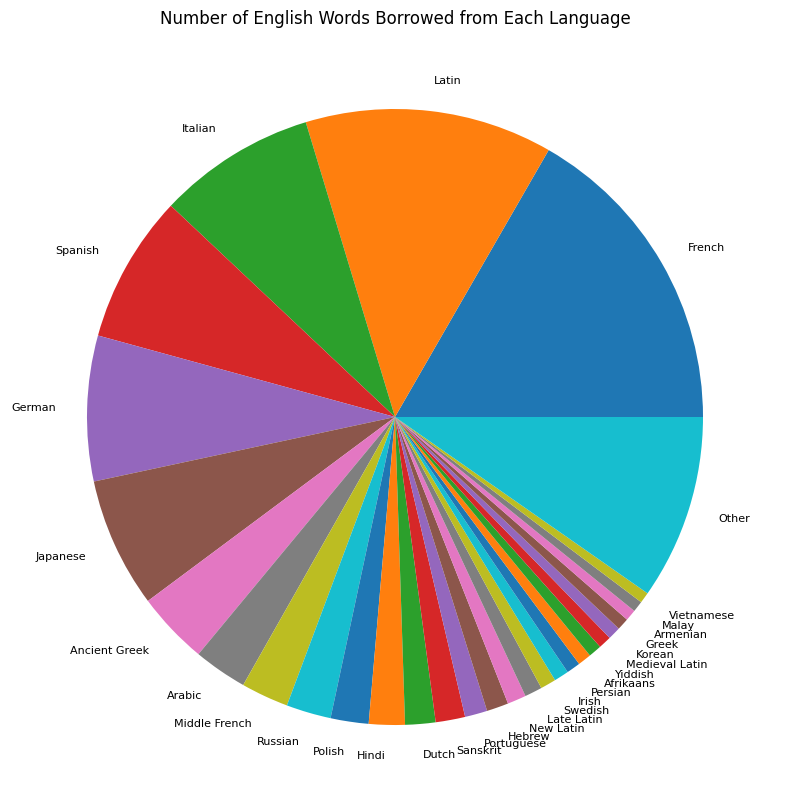

In [19]:
piechart_series.plot.pie(figsize = (10, 10), title = 'Number of English Words Borrowed from Each Language', fontsize = 8)

In [20]:
engl[engl['term'] == 'the']

,term,reltype,related_lang,related_term
4957,the,group_derived_root,NaN,NaN
4958,the,inherited_from,Middle English,the
4959,the,inherited_from,Old English,þē
4960,the,etymologically_related_to,Old English,sē
4961,the,group_related_root,NaN,NaN
4962,the,etymologically_related_to,Old English,sē
4963,the,etymologically_related_to,Old English,sēo
4964,the,etymologically_related_to,Old English,þæt
4965,the,etymologically_related_to,Old English,þā
4966,the,etymologically_related_to,Old English,sē


***Create dataframe from the unigram frequency dataset***

In [21]:
freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
freqs

,count
word,
the,23135851162
of,13151942776
and,12997637966
to,12136980858
a,9081174698
...,...
gooek,12711
gooddg,12711
gooblle,12711


***Join the etymology and unigram frequency dataframes and having count remain the same as in the unigram frequency dataframe and add a frequency column that gives the percentage that a word is used in the english language.***

In [22]:
# engl['frequency'] = engl['term'].apply(lambda word: freqs.loc[word] if (word in freqs.index) else -1)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
df

,reltype,related_lang,related_term,count,freq
term,,,,,
the,cognate_of,West Frisian,de,2.313585e+10,3.933838e-02
the,inherited_from,Proto-Indo-European,*só,2.313585e+10,3.933838e-02
the,inherited_from,Proto-Germanic,*sa,2.313585e+10,3.933838e-02
the,cognate_of,Dutch,des te,2.313585e+10,3.933838e-02
the,etymologically_related_to,Old English,þæt,2.313585e+10,3.933838e-02
...,...,...,...,...,...
munting,has_affix,English,-ing,1.271400e+04,2.161788e-08
unswitched,has_prefix_with_root,English,switched,1.271200e+04,2.161448e-08
unswitched,has_prefix,English,un,1.271200e+04,2.161448e-08


# Hypothesis 1

***This hypothesis explores the possibility if words with high vs low frequency have large differences in which languages they are borrowing from. We determine the hypothesis by extrapolating borrowed from relationships and splitting the data into high medium and low frequency word displaying each type of frequency's language distribution using a piechart. Then using an foneway test we can determine if there is a statistical and meaningful difference between those distribution among the frequency levels.***

H0: There is no difference between the distribution of what languages the top 2000 loanwords have been borrowed from, the distribution of languages the top 2000-4000 loanwords have been borrowed from, and the distribution of languages loanwords other than the top 4000 have been borrowed from.

HA: There is a difference between the distribution of what languages the top 2000 loanwords have been borrowed from, the distribution of languages the top 2000-4000 loanwords have been borrowed from, and the distribution of languages loanwords other than the top 4000 have been borrowed from.


***Read in etymology dataset and create dataset of only relationship types of borrowed from.***

In [23]:
df = pd.read_csv('etymology.csv')
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df

,term_id,lang,term,reltype,related_term_id,related_lang,related_term,position,group_tag,parent_tag,parent_position
1,8_rYLlLyVOKJlGFPZIvpVA,English,thesaurus,borrowed_from,fhl-sdgwXaWvYD8CgaKXpQ,Latin,thēsaurus,0,NaN,0IIU6TlkSA2D7dg1PfxGOw,0.0
7,BuO_dtS5XKenvDCLQimf5w,English,portmanteau,borrowed_from,oJ3zx8hYXials2kAAjz5gQ,French,portemanteau,0,NaN,Qrj8AH3fQwCGRuUYYo7Gxg,0.0
13,S2ihvAI4U8mYhlGXut0m4A,English,encyclopedia,borrowed_from,yUSPc9IAURGYDvZmqwsxkg,New Latin,encyclopaedia,0,NaN,x6rAKkpOQryGjwMv1K91tA,1.0
20,JN6Uml0yVsW5IXZMLr94gg,Latin,encyclopaedia,borrowed_from,cAiYCdUVXxe7CzwKH3rR1g,Ancient Greek,ἐγκυκλοπαιδεία,0,NaN,NaN,NaN
28,gLn6rnxoXkOzL8toyfFUxQ,English,dictionary,borrowed_from,WpjTSFgXURCSb7znC_-I0A,Medieval Latin,dictiōnārium,0,NaN,GiNcoHLcQrmADZExf3i-xA,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3884298,p1QoEAf8VRKDZZUjqu8ogw,Moore,gepeyɛse,borrowed_from,TUQHqUrBUM2-ThnE06SDEQ,French,GPS,0,NaN,NaN,NaN
3884299,p1QoEAf8VRKDZZUjqu8ogw,Moore,gepeyɛse,borrowed_from,It3qxAPhWqexOuLLcXt32w,English,GPS,0,NaN,NaN,NaN
3884304,AHdJhOkfViaVum6Ajl8n5A,Swedish,luttra,borrowed_from,B0cSxbW7WRiXsIXv_gdQoA,Middle Low German,lûtteren,0,NaN,CqwMHKcYQVmENCODDpntDg,0.0
3884332,ttDtihHdV4aL8aDWZpIgnQ,English,Boell,borrowed_from,AUIYyyL0V_2rTzbDwWeVig,Danish,Bøll,0,NaN,VfBh8FOWR_muVFpFl7EOvw,0.0


***Split the dataframe from above into the highest 2,000 frequency words, the next highest 2,0000 frequency words, and every word after 4,000 (we do it in this way as the total frequency of words after the highest 4,0000 is much less even though there might be more words in that category). Also create an other category to capture all languages where they are borrowed from less than 15 times to make the chart more understandable.***

In [24]:
top_2000_df = borrowed_df.iloc[:2000]
top_4000_df = borrowed_df.iloc[2000:4000]
other_df = borrowed_df.iloc[4000:]

top_2000_counts = top_2000_df['related_lang'].value_counts()
top_2000_lst = top_2000_counts[top_2000_counts >= 15]
top_2000_other = pd.Series({'Other': top_2000_counts[top_2000_counts < 15].sum()})
top_2000_series = pd.concat([top_2000_lst, top_2000_other])

top_4000_counts = top_4000_df['related_lang'].value_counts()
top_4000_lst = top_4000_counts[top_4000_counts >= 15]
top_4000_other = pd.Series({'Other': top_4000_counts[top_4000_counts < 15].sum()})
top_4000_series = pd.concat([top_4000_lst, top_4000_other])

other_counts = other_df['related_lang'].value_counts()
other_lst = other_counts[other_counts >= 20]
other_other = pd.Series({'Other': other_counts[other_counts < 20].sum()})
other_series = pd.concat([other_lst, other_other])

***Plot the highest frequency words distribution.***

<Axes: title={'center': 'Number of The Top 2000 English Loanwords Borrowed from Each Language'}>

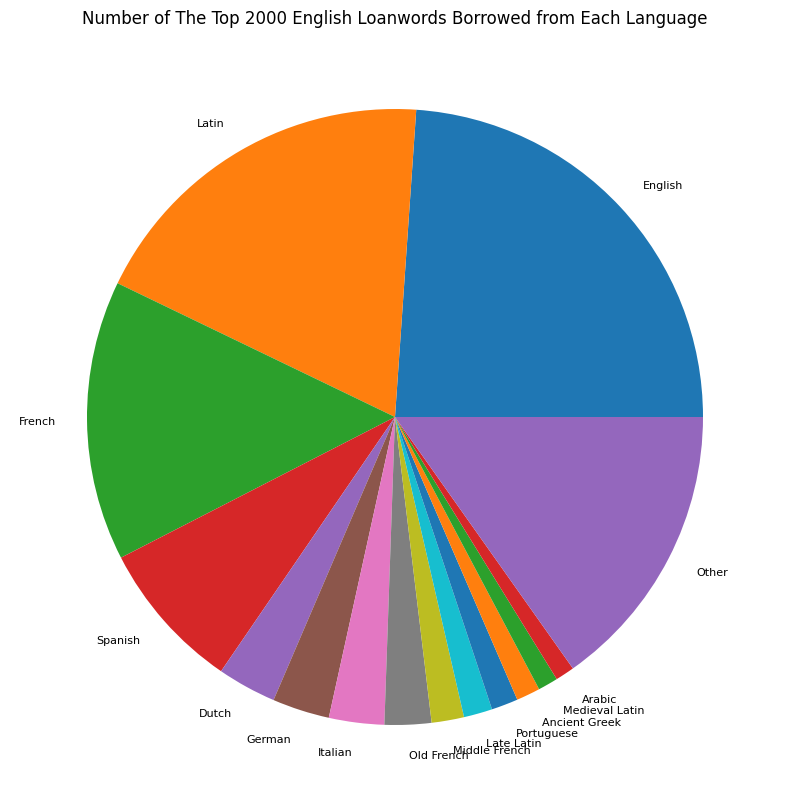

In [25]:
top_2000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000 English Loanwords Borrowed from Each Language', fontsize = 8)


***Plot the medium frequency words distribution***

<Axes: title={'center': 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language'}>

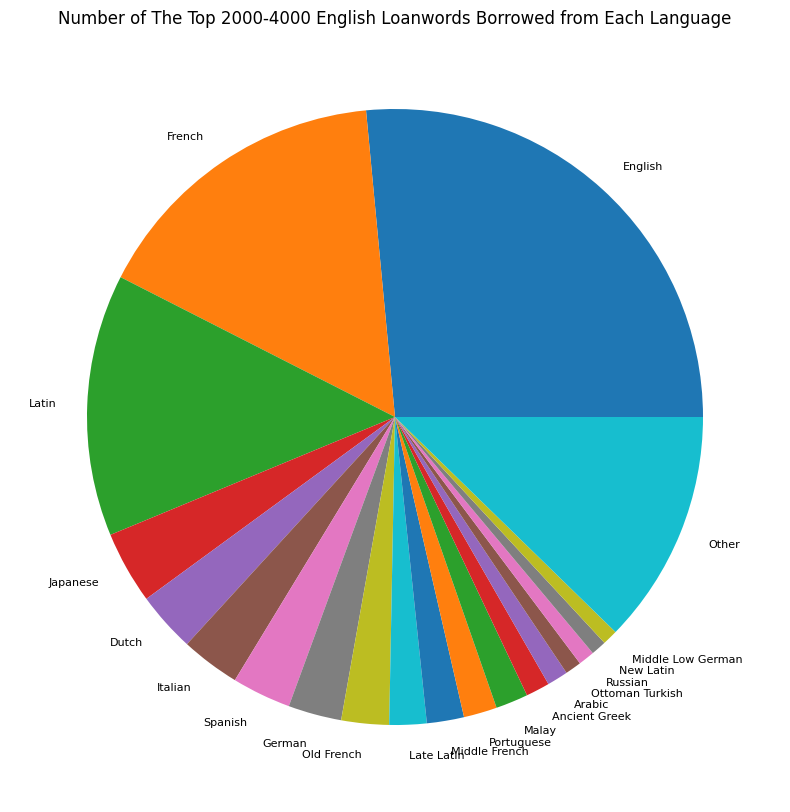

In [26]:
top_4000_series.plot.pie(figsize = (10, 10), title = 'Number of The Top 2000-4000 English Loanwords Borrowed from Each Language', fontsize = 8)


***Plot the lowest frequency words distribution***

<Axes: title={'center': 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language'}>

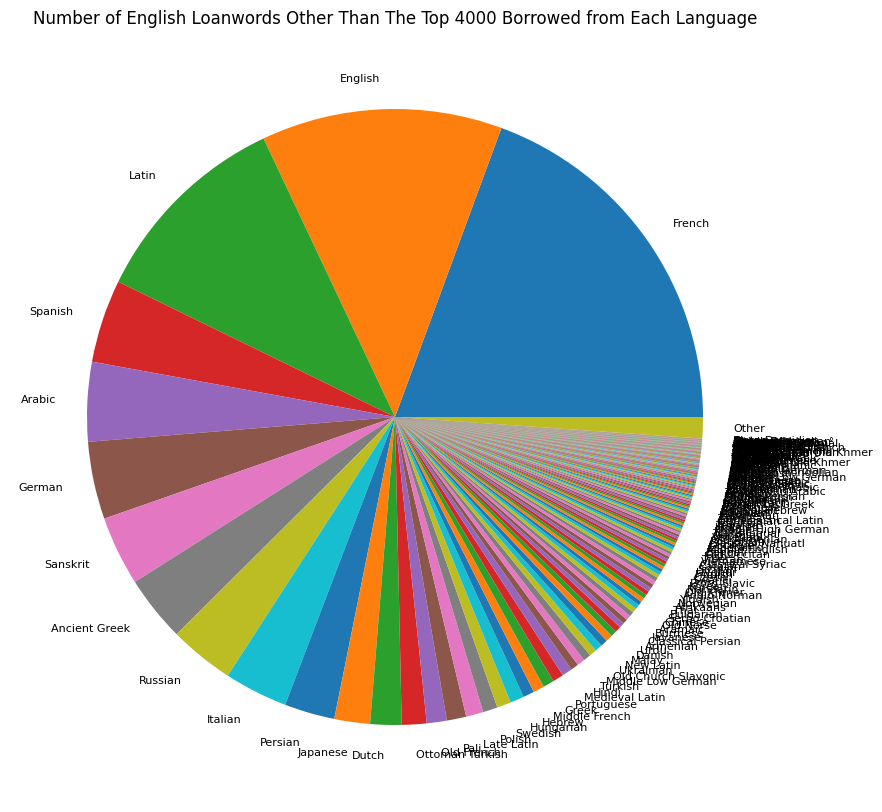

In [27]:
other_series.plot.pie(figsize = (10, 10), title = 'Number of English Loanwords Other Than The Top 4000 Borrowed from Each Language', fontsize = 8)


***We use a f_oneway test which is an implementation of an one way anova test which determines the differences in groups. It calculates an f-statistic that looks at the variance of the data between groups and utilizes that to quantify a p-value which we can use to either reject or fail to reject our null hypothesis.***

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from scipy.stats import f_oneway

etymology = pd.read_csv('etymology.csv')
df = etymology[etymology['lang'] == 'English']
engl = df.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)

freqs = pd.read_csv('unigram_freq.csv')
freqs.set_index('word', inplace = True)
df = engl.set_index('term').join(freqs).sort_values('count', ascending = False).dropna(subset = ['count'])
df['freq'] = df['count'] / freqs['count'].sum()
borrowed_df = df[df['reltype'] == 'borrowed_from']
borrowed_df
group1 = borrowed_df.iloc[:2000]
group2 = borrowed_df.iloc[2000:4000]
group3 = borrowed_df.iloc[4000:]

group1_counts = group1['related_lang'].value_counts()
group2_counts = group2['related_lang'].value_counts()
group3_counts = group3['related_lang'].value_counts()

all_languages = set(group1_counts.index) | set(group2_counts.index) | set(group3_counts.index)
group1_counts = group1_counts.reindex(all_languages, fill_value=0)
group2_counts = group2_counts.reindex(all_languages, fill_value=0)
group3_counts = group3_counts.reindex(all_languages, fill_value=0)

combined = pd.DataFrame({
    'Group 1': group1_counts,
    'Group 2': group2_counts,
    'Group 3': group3_counts
}).fillna(0)


combined['Group 3']*=(2000/4138)


combined = combined.sort_values(by='Group 1')
f_oneway(combined['Group 1'], combined['Group 2'], combined['Group 3'])

F_onewayResult(statistic=np.float64(1.3252343885434826e-31), pvalue=np.float64(1.0))

**Conclusion for Hypothesis #1:**

Since the p value is 1, we fail to reject the null hypothesis. There is no significant evidence to prove that there is a difference between the distribution of what languages the top 2000 loanwords have been borrowed from, the distribution of languages the top 2000-4000 loanwords have been borrowed from, and the distribution of languages loanwords other than the top 4000 have been borrowed from.

# Hypothesis 2

This hypothesis determines if there is a difference in the number of total language relations a word has based on that words frequency. We do this by using the etymology and unigram frequency datasets in conjunction and doing statistical tests on the frequency vs the # of related languages. This will tell us if more commonly used words differ in the amount of languages that they are related to vs less commonly used words. This will be useful for future analysis as we will later look into prediciting the language a word originates from and knowing if there is a correlation between frequency and the number of languages related may help us to improve accuracy in our machine learning steps below. 

H0: There is no difference in the amount of language relations for more frequently used English words.

Ha: More frequently used English words have a significantly different (more or less) amount of language relations.


***Read in etymology and unigram frequency datasets and get english words from etymology and create a dataframe that shows each words number of related languages. Merge this with the unigram frequency dataframe. We then use the frequency as the x variable and the number of related languages of the y variable and use seaborn and matplotlib to create a scatter plot with a correlation line to visualize the relationship.***

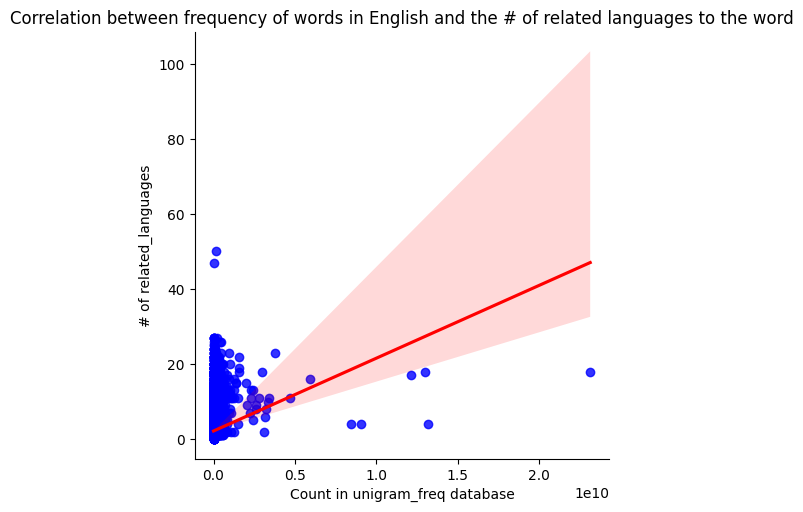

0.12038166275051536


In [29]:
#Hypothesis #2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ety_df = pd.read_csv('etymology.csv')

uni_df = pd.read_csv('unigram_freq.csv')

english_ety = ety_df[ety_df['lang'] == 'English'].groupby('term')['related_lang'].nunique()

new_df = pd.merge(uni_df, english_ety, left_on= 'word', right_on = 'term', how = 'inner')


import seaborn as sns






scatter_df = new_df[['count', 'related_lang']]

scatter_df = scatter_df.rename(columns={'count': 'x', 'related_lang': 'y'})

correlation = scatter_df['x'].corr(scatter_df['y'])

sns.lmplot(x='x', y='y', data=scatter_df, line_kws={'color': 'red'}, scatter_kws={'color': 'blue'})

plt.xlabel('Count in unigram_freq database')
plt.ylabel('# of related_languages')
plt.title('Correlation between frequency of words in English and the # of related languages to the word')

plt.show()

print(correlation)

The above visualization and correlation score of 0.12 tell us that the correlation is not very strong between the two variables.

We split the data into frequency groups to categorize the words into high and low frequency groups, we do this by finding the median frequency for all words and split words based on that median. Next we choose to perform a t-test because we know that high and low frequency words should be in a uniform distribution and both are independent of each other by comparing the means of each group. The t-test is performed using the scripy.stats ttest method and we plot each group (high and low frequency) and showing the mean of both groups to visualize the differences using the axvline and the kdeplot method. 

T-statistic: 72.69283982595081
P-value: 0.0


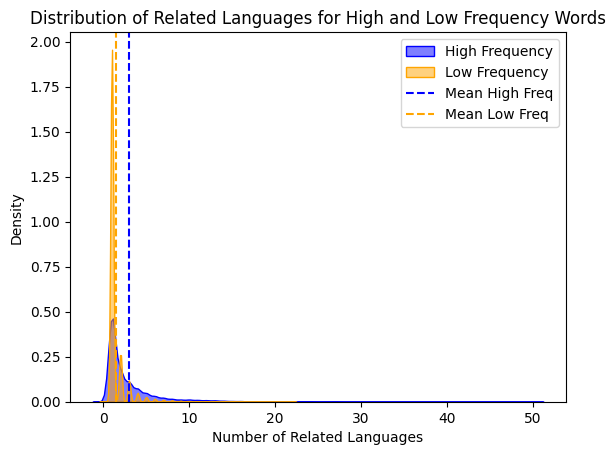

In [30]:
from scipy.stats import ttest_ind

#split the data into two groups based on the median frequency
median_freq = scatter_df['x'].median()
high_freq = scatter_df[scatter_df['x'] > median_freq]['y']
low_freq = scatter_df[scatter_df['x'] <= median_freq]['y']

t_stat, p_value = ttest_ind(high_freq, low_freq)

print(f'T-statistic: {t_stat}\nP-value: {p_value}')

sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)

#Lines for means
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Freq')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Freq')

# Step 3: Customize the plot
plt.title('Distribution of Related Languages for High and Low Frequency Words')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

***The visualization above has the number of related languages on the x-axis, and the denisty of words that have that number of related languages on the y-axis the dotted lines represent the mean of each group. The t-test statistic score is very high (78.69) which tells us that there is a large statistical difference between the data. The p-value being 0 tells us we should reject our null hypothesis.***

We see that there are large differences in the groups of data so we will try to refine and clean our data to see if we can get a different or more clarifying result. We do this by removing outliers using quartiles and removing data that is outside 1.5 times the interquartile range which essentially is removing data that is either very low frequency or very high frequency that may affect our results. After removing these points we again split the data into high and low frequency then compute the correlation (strength of relationship) and perform the ttest again. 

Pearson correlation: 0.2384347980116626
T-statistic: 48.0668546191621
P-value: 0.0


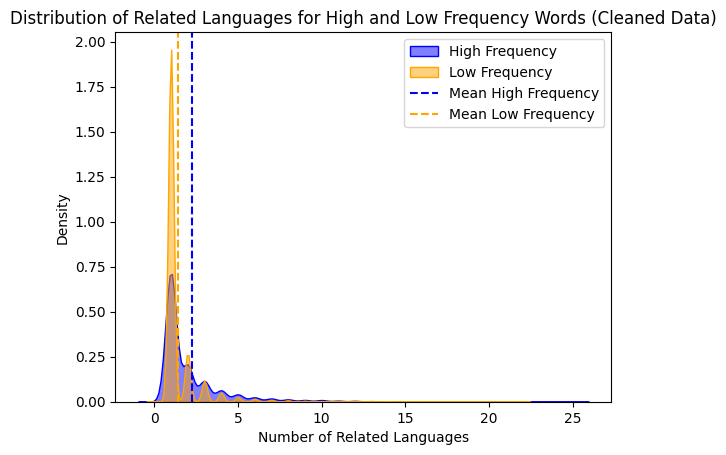

In [31]:
#Remove outliers from scatter_df
Q1 = scatter_df['x'].quantile(0.25)
Q3 = scatter_df['x'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_scatter_df = scatter_df[(scatter_df['x'] >= lower_bound) & (scatter_df['x'] <= upper_bound)]

high_freq = cleaned_scatter_df[cleaned_scatter_df['x'] > median_freq]['y']
low_freq = cleaned_scatter_df[cleaned_scatter_df['x'] <= median_freq]['y']

#Print new stats
correlation = cleaned_scatter_df['x'].corr(cleaned_scatter_df['y'])
print(f'Pearson correlation: {correlation}')

t_stat, p_value = ttest_ind(high_freq, low_freq)
print(f'T-statistic: {t_stat}\nP-value: {p_value}')

#Re-visualizing the distribution plot
sns.kdeplot(high_freq, label='High Frequency', color='blue', fill=True, alpha=0.5)
sns.kdeplot(low_freq, label='Low Frequency', color='orange', fill=True, alpha=0.5)
plt.axvline(high_freq.mean(), color='blue', linestyle='--', label='Mean High Frequency')
plt.axvline(low_freq.mean(), color='orange', linestyle='--', label='Mean Low Frequency')

plt.title('Distribution of Related Languages for High and Low Frequency Words (Cleaned Data)')
plt.xlabel('Number of Related Languages')
plt.ylabel('Density')
plt.legend()
plt.show()

***The results differ in that we get a lower T-statistic score however the score is still high and we get a larger correlation value, this tells us that maybe with more cleaning and refining there may be increased correlations however we still see that there is a significant difference in the means of the two groups and still not a very strong correlation. The visualization shows that the mean lines are slightly closer which follows the T-statistic value being lower.***

**Conclusion for Hypothesis #2:**

Based on the statistical values calculated and the visuals from the graphs, it appears that there is a very small positive correlation between word frequency and amount of unique language relations a word has. The Pearson correlation coefficient is quite small, but upon decreasing extreme outliers does slightly increase, in line with this possibility.

Additionally, the P-values indicate there is no chance the differences found are coincidence. Given the high T-statistic this aligns with the idea that we should reject the null hypothesis, and determine that there is a relationship between word frequency and etymological language relations. That being said, the shapes of the distribution graphs, even after removing extreme outliers, have several modes and are high right-skewed, so this suggests further investigation is needed to determine the meaning of these statistics/conclusions.

It is likely that there is a clear positive relationship with certain commonly used parts of speech--words like "the" come to mind--which would undoubtedly have a rich etymological history.

Overall, the testing suggests a particularly significantly significant difference, the relationship is not strong, thus other factors likely are coming into play.

# Hypothesis #3

This hypothesis explores if certain relationship types e.g. "borrowed from" are more common than others or if all relationship types are equally as common. We will do this by using a chi-squared test. This is significant as if certain relationship types are dominant we would want to adjust our models in later steps to reflect this insight which will help us create a more accurate and usable model. 

H0: The distribution of relationship types in the dataset is uniform

HA: The distribution of relationship types in the dataset is not uniform.
Test: chi-square test for independence


***Load in data from etymology dataset and create a table containing the counts of each relationship type from the etymology dataset***

In [32]:
from scipy.stats import chi2_contingency

# load csv
df = pd.read_csv("etymology.csv")
reltype_counts = df['reltype'].value_counts()

We use a chi-squared test as it is used for comparing categorical data (data that is not numbers but labels) and is helpful for analyzing the distribution of variables such as relationship type this will help us determine if relationship type is independent of the relationship type's frequency.

In [33]:
# hypothesis test
observed = reltype_counts.values
n = sum(observed)
k = len(observed)
expected = np.array([n/k] * k)
chi2, p_value = chi2_contingency([observed, expected])[0:2]

print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 3024167.2777962754
p-value: 0.0


The results give us a extremely high chi-square statistic value which tells us that there is a very large difference in the actual distribution when compared to a normal distribution showing that relationship types are not equally as common.

***In this cell we create a distribution to show us which relationship types are more and less common than others and we say that if a relationship type is seen less than 2,000 times we will group them into the other category.***

Text(0, 0.5, 'Occurences')

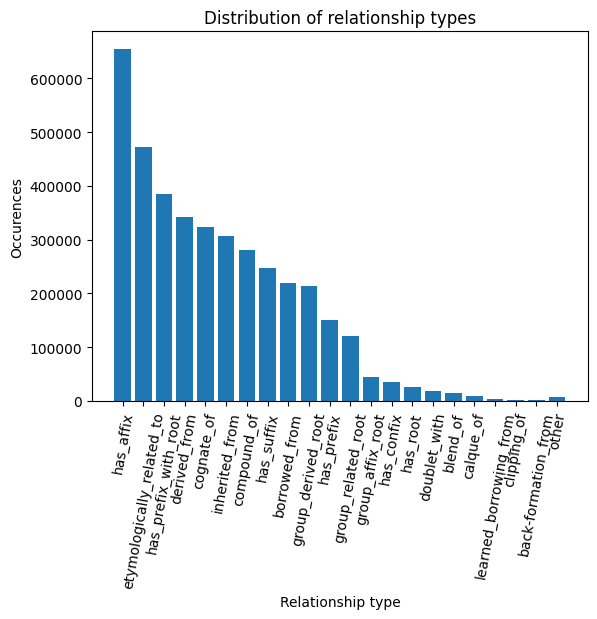

In [34]:
# bar
other = 0
labels = []
values = []

for reltype in reltype_counts.index:
  if reltype_counts[reltype] < 2000:
    other += reltype_counts[reltype]
  else:
    labels.append(reltype)
    values.append(reltype_counts[reltype])

plt.bar([*labels, "other"], [*values, other])
plt.xticks(rotation=80)
plt.title("Distribution of relationship types")
plt.xlabel("Relationship type")
plt.ylabel("Occurences")

We chose a bar graph to visualize the data as it simplifies the data and makes it extremely easy to read and compare frequencies between different relationship types. Seeing bars of unequal sizes lines up with our results from the chi-squared test as the frequencies of each different type of relationship are vastly different as shown by the differing bar heights, which tells us that we can reject our null hypothesis. 

**Conclusion for test 3**

We reject the null hypothesis that the distribution of relationship types is uniform. There is extremely strong statistical evidence to support the alternative hypothesis that the relationship types are not equally distributed in the dataset.

# Machine Learning Analysis

***Part One: English loanword language families***

**Problem**: Create a model that can predict which language family an English loanword was borrowed from. This is a modification from predicting what language an English loanword is from, our original idea. This is an effort to improve accuracy. Since languages within a language family are similar and have many similar sounding words (think Spanish, Portuguese, French, Italian), it is easy to confuse a Spanish loanword for Italian, French, or Portuguese and vice versa. This test aims to eliminate that issue.

Here, the data table is modified so that the 'related_lang' column takes the old languages and maps them to their corresponding language families. For example, if related_lang said "French" or "Spanish" or "Latin" or "Middle French" in the old data table, they now say "Latin" in the new data table, since they are all Latin based languages.

**Analysis Steps**:
1. Encode the terms (features) and language families (targets)
2. Perform K-Fold Cross Validation with K-Nearest Neighbors, Decision Tree, and Random Forest models
3. Train a Feed-Forward Neural Network model
4. Train a Recurrent Neural Network model
5. Visualization

First we start with encoding:
* Standard word embedding library models (e.g. Word2Vec, BERT) don't work for us because they encode the semantic meanings of words but we want models to use individual letters as features, so transfer learning doesn't help us here
* Direct one-hot encoding only works for languages, not terms
* We tried using CountVectorizer for the terms, which counts the frequency of substrings of particular sizes in each word, but the number of dimensions of the input grew to be in the thousands and dimensionality reduction didn't help
* Instead, for cross validation and the FNN model we converted each word to a list of ASCII values, applied min-max scaling, and padded each list so that they were all the same length (after which we used principal components analysis for dimensionality reduction for good measure, although that could be redundant)
* For the RNN model, we used an approach which includes converting each word to a tensor with one-hot encodings of each letter

In [ ]:
# Preparing ml_df DataFrame for Machine Learning Analysis
ml_df = borrowed_df.drop(['reltype', 'related_term', 'count', 'freq'], axis = 1)
langs = ml_df.value_counts()[ml_df.value_counts() >= 100].index.get_level_values(0)
ml_df = ml_df[ml_df['related_lang'].isin(langs)].reset_index().drop_duplicates().dropna()

#here, we map a language to its corresponding language family.
language_to_family = {
    "Middle French": "Latin",
    "New Latin": "Latin",
    "Late Latin": "Latin",
    "French": "Latin",
    "Spanish": "Latin",
    "Italian": "Latin",
    "German": "Germanic",
    "Hindi": "Sanskrit",
    "Ancient Greek": "Hellenic",
    "Dutch": "Germanic",
    "Arabic": "Semitic",
    "Japanese": "Japonic",
    "Latin": "Latin",
    
}
    
    

# Here, we update the 'related_lang' column with the corresponding language family
ml_df['related_lang'] = ml_df['related_lang'].map(language_to_family)

ml_df

,term,related_lang
0,or,Latin
1,as,Latin
2,no,Latin
3,so,Japonic
4,back,Latin
...,...,...
6398,triolet,Latin
6399,rempli,Latin
6400,cachepot,Latin
6401,blessure,Latin


In [ ]:
# Finding the maximum word length in ml_df
max_word_length = max([len(str(word)) for word in ml_df['term'].values])
max_word_length

18

In [ ]:
# Preparing the array of features X
X = [([(ord(c) - 97) / 26 for c in list(word)] + ([-1] * (max_word_length - len(word)))) for word in [str(word) for word in ml_df['term'].values]]
X[0]

[0.5384615384615384,
 0.6538461538461539,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [ ]:
# Preparing the array of targets y
y = [str(lang) for lang in ml_df['related_lang'].values]
y[0]

'Latin'

In [ ]:
# Importing the necessary modules for encoding the features and targets
from sklearn.preprocessing import OneHotEncoder
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

# Test dataset is 20% of the data
seed = 42
test_size = 0.2

In [ ]:
# Dimensionality reduction of X using PCA
pca = PCA(n_components = 12)
X_pca = pca.fit_transform(X)
X_pca

array([[-1.62315221,  0.98673352, -0.77925854, ..., -0.17699336,
         0.61193934,  0.00789381],
       [-1.61196386,  0.98342806, -0.77002492, ..., -0.09707927,
         0.81978118,  0.00502686],
       [-1.62388795,  0.98415434, -0.77746888, ..., -0.13486967,
         0.69875512,  0.01102588],
       ...,
       [ 0.96706431, -0.56757192, -0.82926439, ..., -0.10366399,
         0.62386879,  0.05713942],
       [ 0.92803864, -1.01502757, -0.25364389, ..., -0.11248589,
         0.30755099,  0.01764142],
       [ 1.65599116,  0.70233064, -0.06117998, ..., -0.37162951,
         0.36183277,  0.24566881]])

In [ ]:
# How well the dimensionality reduction explains variance in the data
sum(pca.explained_variance_ratio_)

0.9908155936134219

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = test_size, random_state = seed)

**K-Fold Cross Validation:**
* In this step we perform k-fold cross validation which splits the data into k number of groups of equal size then trains the model on k-1 groups and tests on the last group. In this case we choose a k value of 5 and therefore we split the data into 5 equal parts, train on 4 and test on one. We repeat this process k (5) times choosing new groups each time. We average the scores from all runs to get our final score.
* Accuracies are better compared to individual languages, but this could be due to overfitting. The number of words from Latin based languages are much greater than other language families, so the model would learn patterns of Latin based languages better.

We also use 3 different models, KNN which uses the k number of closest neighbors to classify a datapoint, Decision tree which uses a tree like structure and makes decisions based on the features (related languages) of a word to classify it, and a random forest classifier which creates multiple decision trees by choosing groups of the data at random. 

In [ ]:
# K-Fold Cross Validation
models = {
            'KNN' : KNeighborsClassifier(),
            'Decision Tree' : DecisionTreeClassifier(),
            'Random Forest' : RandomForestClassifier(),
         }

k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=seed)

np.random.seed(seed)

for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv = skf)
    print(model_name + ':\n' + '\tMean: ' + str(scores.mean()) + '\n\tStandard Deviation: ' + str(scores.std()))

KNN:
	Mean: 0.7747406297664119
	Standard Deviation: 0.0038076452318340777
Decision Tree:
	Mean: 0.671254809962914
	Standard Deviation: 0.006620973048833363
Random Forest:
	Mean: 0.7889030187598232
	Standard Deviation: 0.0057627372819359125


Perform one hot encoding which is adding a column for each relationship type and if a word has a relationship type we have 1 in that cell and -1 to represent not having that relationship type. Then we split the data into training and testing sets. 

In [ ]:
# One-Hot Encoding y for MLP Classification
enc = OneHotEncoder()
y = enc.fit_transform(np.reshape([str(lang) for lang in ml_df['related_lang'].values], (-1, 1))).toarray()
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = test_size, random_state = seed)

In [ ]:
# Importing ML modules
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Preparing datasets for MLP Classification
train_data = TensorDataset(torch.tensor(X_train), torch.tensor(y_train))
test_data = TensorDataset(torch.tensor(X_test), torch.tensor(y_test))

train_loader = DataLoader(train_data, batch_size = 5122, shuffle = True)
test_loader = DataLoader(test_data, batch_size = 1281)

batch_size = train_loader.batch_size
num_train_data = len(train_loader.dataset)
num_test_data = len(test_loader.dataset)
feat_dim = len(next(iter(train_loader))[0][0])
out_dim = len(next(iter(train_loader))[1][0])

We next implement an FNN model (Feed-forward Neural Network) which consists of layers each with nodes inside. The first layer (input layer) has nodes that represent the features or attributes of the data. Then the hidden layer(s) which take the data from the input layer and applies mathematical functions to the data to transform them into patterns, and an output layer that receives the output from the hidden layer and outputs a prediction. We implement it using multiple hidden layers each with 32 nodes and an activation function called relu (if above 0 same if below 0 set it to 0).

In [ ]:
# Setup for FNN model
# Note: softmax is not used for last layer because we are using Cross Entropy Loss

class MLPModel(nn.Module):
    def __init__(self, feat_dim, out_dim):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(feat_dim, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 32)
        self.fc4 = nn.Linear(32, out_dim)
        self.double()

    def forward(self, x):
        x1 = F.relu(self.fc1(x))
        x2 = F.relu(self.fc2(x1))
        x3 = F.relu(self.fc3(x2))
        return self.fc4(x3)

# Instantiating the model
model = MLPModel(feat_dim, out_dim)

This step runs the FNN applying a loss function to determine how far off we are from the correct label vs our predicted label.

In [ ]:
# Using Cross Entropy Loss with Adam Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.01)
# optimizer = torch.optim.SGD(model.parameters(), lr=3e-3, momentum=0.9)

# Training
epochs = 1000
print_every = 50
losses = []
for epoch in range(1, epochs + 1):
    running_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        preds = model(data)
        loss = criterion(preds, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    losses.append(loss.item())
    if (epoch % print_every == 0):
        print(f'Epoch {epoch}/{epochs}, Loss: {loss.item()}')

print('Finished Training')

Epoch 50/1000, Loss: 0.7589741482504668
Epoch 100/1000, Loss: 0.7410319188295469
Epoch 150/1000, Loss: 0.72158223378215
Epoch 200/1000, Loss: 0.7060418670640737
Epoch 250/1000, Loss: 0.6813799161208577
Epoch 300/1000, Loss: 0.6570901167320806
Epoch 350/1000, Loss: 0.6353815211901278
Epoch 400/1000, Loss: 0.620592074007102
Epoch 450/1000, Loss: 0.6059890156305182
Epoch 500/1000, Loss: 0.5975639869724152
Epoch 550/1000, Loss: 0.5780427043599807
Epoch 600/1000, Loss: 0.5668173404797434
Epoch 650/1000, Loss: 0.560328087118418
Epoch 700/1000, Loss: 0.5656287569240225
Epoch 750/1000, Loss: 0.5417641235080846
Epoch 800/1000, Loss: 0.5272664994029032
Epoch 850/1000, Loss: 0.5193815688880229
Epoch 900/1000, Loss: 0.5214982741561087
Epoch 950/1000, Loss: 0.5028491974934809
Epoch 1000/1000, Loss: 0.49464219110504287
Finished Training


We visualize our loss overtime by creating a line graph of loss over our 1000 iterations.

Train Loss: 0.494872431391333
Test Loss: 1.25661980140083


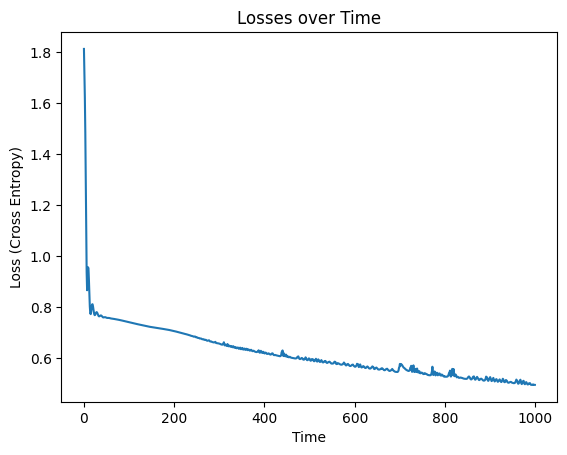

In [ ]:
# Plotting loss function for each iteration of training
test_loss = 0.0
for batch_idx, (data, targets) in enumerate(test_loader):
    loss = criterion(model(data), targets)
    test_loss += loss.item()
test_loss = test_loss / len(test_loader)

train_loss = 0.0
for batch_idx, (data, targets) in enumerate(train_loader):
    loss = criterion(model(data), targets)
    train_loss += loss.item()
train_loss = train_loss / len(train_loader)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

plt.plot(losses)
plt.title("Losses over Time")
plt.xlabel("Time")
plt.ylabel("Loss (Cross Entropy)")
plt.show()

This graph tells us that our loss is going down the more times we go through the FNN. This means the model is learning well from the data and is slowly becoming more and more accurate telling us that the model is getting better at predicting which language family a word from the english language comes from. 

In [ ]:
# Encoding words to tensors for RNN classification
import string

def word_to_tensor(word):
    try:
        tensor = torch.zeros(len(word), 1, 26)
        for li, letter in enumerate(word):
            tensor[li][0][string.ascii_lowercase.find(letter)] = 1
        return tensor
    except:
        print(word)

# Example encoding
word_to_tensor('ab')

tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0.]]])

RNN is a recurrent neural network. This is slightly different from a FNN as it handles data sequentially and remembers previous input. The way in which it differs from a FNN is that instead of individual data points it goes in order and updates the hidden layers using information that it has learned from previous inputs continously. 

* Created following this [PyTorch tutorial](https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial)

***Create the RNN model.***

In [ ]:
# Setup for RNN classification
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    # initHidden
    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

# Instantiating the RNN model
all_langs = ml_df['related_lang'].unique()
n_letters = 26
n_langs = len(all_langs)
n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_langs)

***Example test of RNN.***

In [ ]:
# Example RNN output for input 'word'
input = word_to_tensor('word')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)

tensor([[-1.8515, -1.7936, -1.8324, -1.8613, -1.7390, -1.6850]],
       grad_fn=<LogSoftmaxBackward0>)


In [ ]:
# Converting output into a language classification
def lang_from_output(output):
    top_n, top_i = output.topk(1)
    lang_i = top_i[0].item()
    return all_langs[lang_i], lang_i

# Classification of above example
lang_from_output(output)

('Sanskrit', 5)

***Create a random sample of words and their borrowed language for training the model***

In [ ]:
# Generating random pairs of words with the languages they were borrowed from
def random_training_example():
    random_row = ml_df.sample(n = 1)
    word = random_row.iloc[0]['term']
    lang = random_row.iloc[0]['related_lang']
    lang_tensor = torch.tensor([list(all_langs).index(lang)], dtype=torch.long)
    word_tensor = word_to_tensor(word)
    return lang, word, lang_tensor, word_tensor

# Examples of pairs
for i in range(100):
    lang, word, lang_tensor, word_tensor = random_training_example()
    print('language =', lang, '/ word =', word)

language = Latin / word = adnexa
language = Latin / word = junta
language = Latin / word = perineum
language = Latin / word = gavage
language = Latin / word = primo
language = Latin / word = brasserie
language = Latin / word = skeleton
language = Latin / word = integral
language = Latin / word = habanera
language = Latin / word = socialism
language = Latin / word = adduction
language = Sanskrit / word = chur
language = Hellenic / word = scalene
language = Latin / word = breccia
language = Latin / word = bazaar
language = Latin / word = detritus
language = Latin / word = alambre
language = Latin / word = abonnement
language = Latin / word = inventor
language = Japonic / word = ninja
language = Latin / word = salute
language = Latin / word = mistic
language = Hellenic / word = raphe
language = Latin / word = ponce
language = Latin / word = continuum
language = Latin / word = morion
language = Latin / word = isolation
language = Latin / word = mezquita
language = Hellenic / word = dyad
la

In [ ]:
# Defining loss function, learning rate, and training function
criterion = nn.NLLLoss()

learning_rate = 0.005

def train(lang_tensor, word_tensor):
    hidden = rnn.init_hidden()

    rnn.zero_grad()

    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    loss = criterion(output, lang_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

In [ ]:
import time
import math


# Number of epochs is so high because we're using a batch size of 1
# On average takes about 5 minutes to finish training
n_iters = 100000
print_every = 5000
plot_every = 1000



# Keeping track of losses for plotting
current_loss = 0
all_losses = []

# Keeping track of time elapsed
def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

# Training
for iter in range(1, n_iters + 1):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output, loss = train(lang_tensor, word_tensor)
    current_loss += loss

    if iter % print_every == 0:
        guess, guess_i = lang_from_output(output)
        correct = '✓' if guess == lang else '✗ (%s)' % lang
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, word, guess, correct))

    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 16s) 0.2465 expose / Latin ✓
10000 10% (0m 32s) 0.0345 complicate / Latin ✓
15000 15% (0m 48s) 0.7163 gena / Latin ✓
20000 20% (1m 4s) 0.0609 rafale / Latin ✓
25000 25% (1m 21s) 0.0486 reparable / Latin ✓
30000 30% (1m 36s) 0.0207 oeuvre / Latin ✓
35000 35% (1m 52s) 2.8627 auslese / Latin ✗ (Germanic)
40000 40% (2m 7s) 0.1071 dauphine / Latin ✓
45000 45% (2m 21s) 0.0215 okonomiyaki / Japonic ✓
50000 50% (2m 37s) 2.9887 kendra / Japonic ✗ (Sanskrit)
55000 55% (2m 53s) 0.0553 defeatist / Latin ✓
60000 60% (3m 9s) 0.8311 higashi / Japonic ✓
65000 65% (3m 24s) 0.0804 dessert / Latin ✓
70000 70% (3m 40s) 0.0952 stole / Latin ✓
75000 75% (3m 55s) 0.0189 portfolio / Latin ✓
80000 80% (4m 10s) 1.2734 panda / Sanskrit ✗ (Latin)
85000 85% (4m 24s) 0.3106 abra / Latin ✓
90000 90% (4m 39s) 0.2308 oxalic / Latin ✓
95000 95% (4m 54s) 0.0337 apostate / Latin ✓
100000 100% (5m 8s) 2.6700 coma / Latin ✗ (Hellenic)


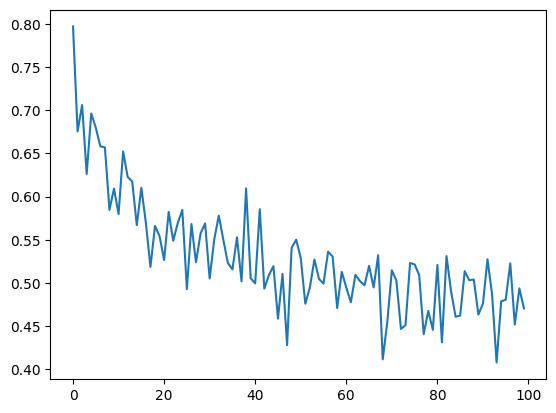

In [ ]:
# Plotting loss
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

***This graph represents the loss (difference in predictions of the model vs actual label) overtime of the model. The graph shows a clear downward trend showing that loss is decreasing overtime and that the model is learning effectively from the training data.***

/tmp/ipykernel_93/41513570.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + all_langs, rotation=90)
/tmp/ipykernel_93/41513570.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + all_langs)


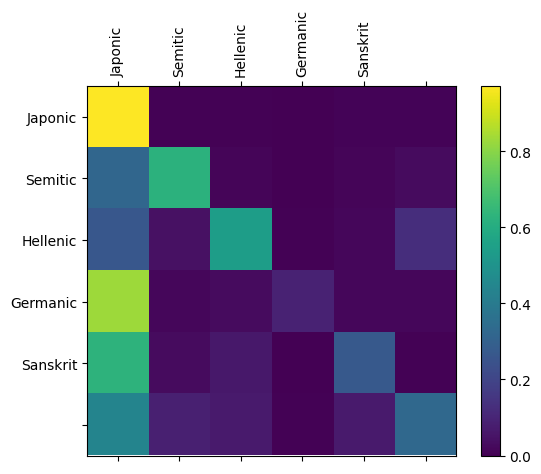

In [ ]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_langs, n_langs)
n_confusion = 10000

# Return an output given a word
def evaluate(word_tensor):
    hidden = rnn.init_hidden()

    for i in range(word_tensor.size()[0]):
        output, hidden = rnn(word_tensor[i], hidden)

    return output

# Record which examples are correctly guessed out of many randomly sampled examples
for i in range(n_confusion):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output = evaluate(word_tensor)
    guess, guess_i = lang_from_output(output)
    lang_i = list(all_langs).index(lang)
    confusion[lang_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_langs):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_langs, rotation=90)
ax.set_yticklabels([''] + all_langs)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
# WARNING: CONFUSION MATRIX DOESN'T SHOW ALL LANGUAGES FOR SOME REASON
plt.show()

***The confusion matrix above represents how well our model performed. The rows represent the true label and the columns represent our models predicted label. We would like to focus on the diagonal lines as those tell us how well it predicted each language family. The color being darker shows a lower accuracy and a brighter color tells us it had higher accuracy for the given language family. Through this we can see that Japonic had a very high accuracy, while Semitic and Hellenic had moderately high prediction scores. Sanskrit and Germanic had pretty low scores showing the model is not very accurate at classifying those two language families which could point to a certain property of those two language families messing up our model. Japonic having a signficantly higher accuracy score could also tell us that our model heavily favors that language family and could also be a reason for certain innacuracies and misclassifications.***

In [ ]:
# Accuracy for RNN
# Hovers around 52%, which isn't terrible
iters = 1000
correct = 0

for _ in range(iters):
    lang, word, lang_tensor, word_tensor = random_training_example()
    output = evaluate(word_tensor)
    pred_lang = lang_from_output(output)[0]
    if (pred_lang == lang):
        correct += 1

print(correct / iters)

0.852


**Conclusion of ML for lanuage family prediction**

The 0.852 shows us that 85.2% of our iterations of our model correctly predicted the language family. This tells us that our model is accurate in it's classification of a word's language family, but could also be due to more words from better learned language families being used in the evaluation which would require further testing. 

***Part Two of Machine Learning Analysis: Language Region Prediction***

**Problem**: Create a model that can predict which geographical region a word originates from based on its characters. This is an alternative approach to the language family prediction from part one of the machine learning analysis, instead looking at broader geographical patterns rather than purely linguistic relationships. 

By grouping languages by region (Europe, Asia, Africa, Middle East, Central America), we can potentially identify patterns in word formation that are related to certain areas of the world. This helps us explore whether nearby languages develop similar word patterns regardless of their language family.

**Analysis Steps**:
1. Encode the terms (features) and regional classifications (targets)
2. Group languages into geographical regions
4. Train a Recurrent Neural Network model
5. Visualization

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt


etymology = pd.read_csv('etymology.csv')

We start by defining a character encoding system that can handle the letters, including special characters, from the necessary regional linguistics

In [ ]:
# RNN
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from gensim.models import Word2Vec
import gensim

from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

all_letters = {
    "a": 0,
    "b": 1,
    "c": 2,
    "d": 3,
    "e": 4,
    "f": 5,
    "g": 6,
    "h": 7,
    "i": 8,
    "j": 9,
    "k": 10,
    "l": 11,
    "m": 12,
    "n": 13,
    "o": 14,
    "p": 15,
    "q": 16,
    "r": 17,
    "s": 18,
    "t": 19,
    "u": 20,
    "v": 21,
    "w": 22,
    "x": 23,
    "y": 24,
    "z": 25,
    "à": 26,
    "ợ": 27,
    " ": 28
}
n_letters = 29

def letterToIndex(letter):
    return all_letters[letter] if letter in all_letters else -1

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

print(lineToTensor('jones').size())

torch.Size([5, 1, 29])


We then implement the LinguisticRegions class which organizes languages into geographical groups.

In [ ]:
def combineLangs(word):
  word = word.lower()
  if "latin" in word:
    return "latin"
  elif "greek" in word:
    return "greek"
  elif "french" in word:
    return "french"
  elif "german" in word:
    return "german"
  elif "italian" in word:
    return "italian"
  elif "swedish" in word:
    return "swedish"
  elif "irish" in word:
    return "irish"
  elif "english" in word:
    return "english"
  elif "dutch" in word:
    return "dutch"
  elif "turkish" in word:
    return "turkish"
  elif "norwegian" in word:
    return "norwegian"
  elif "frisian" in word:
    return "frisian"
  else:
    return word

class LinguisticRegions:
  def __init__(self):
        self.families = {
            "europe_east": {
                "languages": [
                    "proto-indo-european", "greek", "yiddish", "polish", "russian", "czech", "albanian",
                    "ukrainian", "armenian", "lithuanian", "proto-slavic", "belariusian", "slovene", "proto-slavic"
                    "latvian", "slovak", "turkish",
                 ],
            },
            "europe_west": {
                "languages": [
                    "latin", "french", "irish", "anglo-norman", "english", "german", "dutch", "scottish gaelic",
                    "scots", "portuguese", "spanish", "italian", "welsh", "frankish", "proto-celtic", "catalan",
                    "norman", "breton", "cornish", "proto-brythonic", "old breton", "lombardic"
                ]
            },
            "europe_north": {
                "languages": [
                    "old norse", "swedish", "norwegian", "danish", "icelandic", "norwegian", "frisian", "gothic",
                    "old saxon", "northern sami"
                ]
            },
            "asia_east": {
                "languages": [
                    "japanese", "malay", "chinese", "korean", "mandarin", "tagalog", "vietnamese", "cantonese",
                    "min nan", "mongolian"
                ]
            },
            "asia_south": {
                "languages": [
                    "sanskrit", "urdu", "hindi", "tamil", "thai", "bengali", "tibetan", "indonesian"
                ]
            },
            "africa_south": {
                "languages": [
                    "afrikaans", "zulu"
                ]
            },
            "africa_north": {
                "languages": [
                    "egyptian", "swahili", "algerian arabic",
                ]
            },
            "middle_east": {
                "languages": [
                    "hebrew", "arabic", "persian", "old persian", "akkadian"
                ]
            },
            "central_america": {
                "languages": [
                    "classical nahuatl", "nahuatl"
                ]
            }
        }

  def get_families(self):
      obj = {}
      index = 0
      for x in list(self.families.keys()):
        for y in self.families[x]["common_characters"]:
          obj[y] = index
          index += 1
      return obj

# more precise regions
def getRegionPrecise(lang):
  lang = lang.lower()
  for family in lrs.families.keys():
    if lang in lrs.families[family]["languages"]:
      return family

  return "unknown region"

# general regions
def getRegionGeneral(lang):
  lang = lang.lower()
  if lang in lrs.families["europe_east"]["languages"] or lang in lrs.families["europe_west"]["languages"] or lang in lrs.families["europe_north"]["languages"]:
    return "europe"
  elif lang in lrs.families["asia_east"]["languages"] or lang in lrs.families["asia_south"]["languages"]:
    return "asia"
  elif lang in lrs.families["africa_north"]["languages"] or lang in lrs.families["africa_south"]["languages"]:
    return "africa"
  elif lang in lrs.families["middle_east"]["languages"]:
    return "middle east"
  elif lang in lrs.families["central_america"]["languages"]:
    return "central america"

  return "unknown region"

lrs = LinguisticRegions()

Here we begin data preprocessing, which is more selective in this section than part one due to regional prediction requiring more standardized input to detect meaningful patterns.

In [ ]:
# preprocessing

# getting a sample since it takes really long with the entire set

# these languages use similar alphabets to English
limited = etymology[(etymology['lang'] == 'English') | (etymology['lang'] == 'German') | (etymology['lang'] == 'Spanish') | (etymology['lang'] == 'Italian') | (etymology['lang'] == 'Vietnamese') | (etymology['lang'] == 'Indonesian')]
limited = limited.drop(['lang', 'term_id', 'related_term_id', 'position', 'group_tag', 'parent_tag', 'parent_position'], axis = 1)
limited = limited.dropna()
print("unique words =", len(limited["term"].unique()))

# combine languages (ie ancient greek -> greek, old english -> english)
limited["related_lang"] = limited["related_lang"].apply(combineLangs)

# select higher frequency languages
frequency = limited['related_lang'].value_counts()
limited['frequency'] = limited['related_lang'].map(frequency)
limited.loc[limited['frequency'] < 10, 'related_lang'] = 'uncommon'
print("unique related languages =", len(limited["related_lang"].unique()))

# filter words that are short
limited = limited[limited["term"].str.len() > 3]

# make everything lowercase
limited["term"] = limited["term"].str.lower()

# reduce each term to it's most frequent related_lang
'''
print("before", len(limited))
count_df = limited.groupby(["term", "related_lang"]).size().reset_index(name="count")
most_common = count_df.loc[count_df.groupby('term')['count'].idxmax()]
limited = pd.merge(limited, most_common[['term', 'related_lang']], on=['term', 'related_lang'])
print("after", len(limited))
'''

# get the region for each language
limited["region"] = limited["related_lang"].apply(lambda x: getRegionGeneral(x)) # replace this with getRegionGeneral or getRegionPrecise

# remove unknown regions
limited = limited[limited["region"] != "unknown region"]

# select from a specific reltype?
limited = limited[limited["reltype"] == "etymologically_related_to"]

# get labels
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
labels = encoder.fit_transform(limited['region'])
print("labels", encoder.classes_)
n_categories = len(encoder.classes_)
all_categories = encoder.classes_.tolist()

print("final data count", len(limited))


unique words = 493440
unique related languages = 330
labels ['africa' 'asia' 'central america' 'europe' 'middle east']
final data count 136784


The RNN model architecture in we implement here is similar to part one with small modifications for regional prediction.

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [ ]:
criterion = nn.NLLLoss()
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()

To handle the imbalanced nature of the regional data (Europe having many more examples than Central America), we implement a weighted sampling strategy:

In [ ]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

# giving europe a higher chance to be selected
better_categories = [*all_categories, "europe", "europe"]

terms = {}
for region in all_categories:
  terms[region] = limited[limited["region"] == region]["term"].values

def randomTrainingExample():
    category = randomChoice(better_categories)
    line = randomChoice(terms[category])
    '''
    line = limited.sample(1)
    category = line["region"].values[0]
    term = line["term"].values[0]
    '''
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('related term region =', category, '/ word =', line)

related term region = central america / word = zapotec
related term region = middle east / word = bracha
related term region = europe / word = wirepuller
related term region = europe / word = under the weather
related term region = central america / word = tlaxcala
related term region = asia / word = sulk
related term region = asia / word = tarka
related term region = middle east / word = cipher
related term region = africa / word = afterclap
related term region = central america / word = paliacate


The training process runs for 20,000 iterations, with regular loss tracking.

In [ ]:
import time
import math

n_iters = 20000
print_every = 500
plot_every = 500

current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        print(timeSince(start), str(iter) + "/" + str(n_iters), "loss:", current_loss / plot_every)
        
    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

0m 1s 500/20000 loss: 1.4357597070932389
0m 2s 1000/20000 loss: 1.4729035410881042
0m 3s 1500/20000 loss: 1.376287968993187
0m 4s 2000/20000 loss: 1.3072273831367494
0m 5s 2500/20000 loss: 1.2282223174273967
0m 6s 3000/20000 loss: 1.2236246595084668
0m 8s 3500/20000 loss: 1.119788611203432
0m 9s 4000/20000 loss: 1.1298937548771502
0m 11s 4500/20000 loss: 1.109079977877438
0m 12s 5000/20000 loss: 1.0223575719445943
0m 13s 5500/20000 loss: 1.0674387348517775
0m 14s 6000/20000 loss: 1.0168003833778203
0m 15s 6500/20000 loss: 1.014099778275937
0m 16s 7000/20000 loss: 0.9503876793496311
0m 17s 7500/20000 loss: 0.9504697736874222
0m 18s 8000/20000 loss: 1.0297078153789043
0m 19s 8500/20000 loss: 0.9668419149741531
0m 20s 9000/20000 loss: 1.000993147071451
0m 22s 9500/20000 loss: 0.9393420968577266
0m 23s 10000/20000 loss: 0.8598171914629639
0m 25s 10500/20000 loss: 0.9069422258082778
0m 27s 11000/20000 loss: 0.8631251152129844
0m 28s 11500/20000 loss: 0.8886279786741361
0m 29s 12000/20000 lo

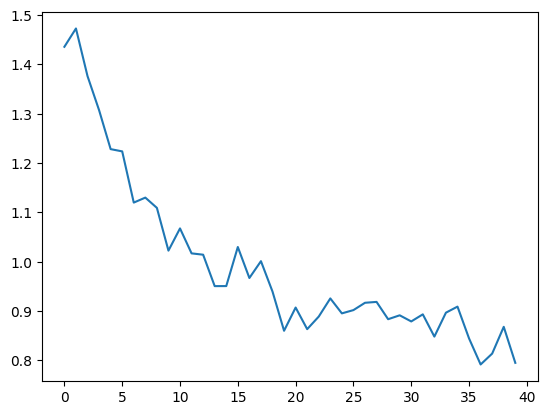

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

Our loss plot visualizes how the model improves its predictions over time, starting at around 1.45 the loss represents the model's initial large error rate in predicting region origins. The steep decline following these first few thousand iterations implies rapid learning as the model discovers basic patterns.

The curve levels off at approximately 0.9 about halfway through, indicating the model has learned the most obvious patterns and/or any remaining error likely comes from inherent overlap in regional patterns, data imbalance (as mentioned with the larger amount of European data), or general ambiguity in word origins.

The plateau is a bit high (at 0.9) suggesting significant uncertainty in regional prediction from word struction alone, which makes sense given how languages influence each other across geographical boundaries as societies interact.

In [ ]:
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 2000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
total = 0
correct = 0
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    total += 1
    correct += 1 if guess == category else 0
    confusion[category_i][guess_i] += 1

print("correct =", correct, "/", total)
print("Total words africa:", len(limited[limited["region"] == "africa"]))
print("Total words asia:", len(limited[limited["region"] == "asia"]))
print("Total words central america:", len(limited[limited["region"] == "central america"]))
print("Total words europe:", len(limited[limited["region"] == "europe"]))
print("Total words middle east:", len(limited[limited["region"] == "middle east"]))


correct = 1359 / 2000
Total words africa: 168
Total words asia: 3912
Total words central america: 275
Total words europe: 131227
Total words middle east: 1202


<ipython-input-172-6f4f54481151>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
<ipython-input-172-6f4f54481151>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


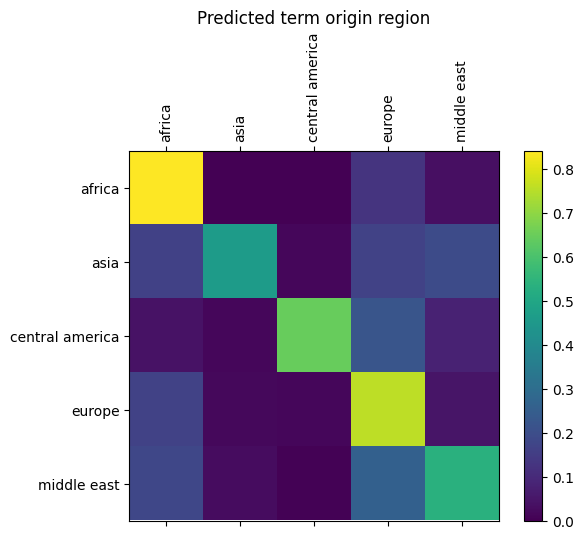

In [ ]:

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.title("Predicted term origin region")

# sphinx_gallery_thumbnail_number = 2
plt.show()

**Conclusion of ML for lanuage region prediction**

The final results and visualizations of this section suggest that despite the loss plateau not being as low as would be preferred, the rest of the data, particularly our confusion matrix, does suggest the model achieves meaningful prediction rates above random chance. This suggests further that regional patterns do exist in word formation, as was expected.

# Overall Conclusions

The problem of understanding and predicting word origins through etymology is complex and multifaceted. While our analysis cannot fully capture the intricate nature of language evolution, our analysis of etymologies has revealed several insights into how languages interact and influence each other, and how one goes about studying language data.

Our etymology dataset contained features directly tied to word origins and relationships between languages. Word frequency and relationship types served as key metrics for understanding how commonly words are used and how they relate to other languages. Through exploratory data analysis we discovered several significant patterns:

Language Relationship Patterns:
* Word frequency showed a weak but statistically significant correlation with the number of etymological relationships.
* High-frequency words did not show significantly different language origin patterns from low-frequency words.
* Relationship types were distinctly non-uniform, with some types like "borrowed_from" being dramatically more common.

Machine Learning Applications:
* Language family prediction achieved 85.2% accuracy in our iterations, demonstrating that character-based patterns can effectively predict word origins.
* Regional prediction showed promise but highlighted the complexity of geographical language interactions.
* The difference in plateau levels for loss between the language family and language region models reflect the greater challenge in identifying regional versus linguistic family patterns in words.

While our analysis provides valuable insights, it also raises interesting questions for further research:
* What makes certain language families harder to predict than others?
* What historical phenomenon could influence language patterns to make cross-regional classification more distinct in some crossovers than others?
* How might part of speech play into regional distinction?

Future work might focus on:
* Incorporating temporal data to track changes in borrowing patterns over time.
* Analyzing semantic shifts alongside phonetic changes.
* Developing more sophisticated models that can account for multiple possible etymology paths.

# Resources for further learning:

[Etymology](https://en.wikipedia.org/wiki/Etymology) <br> <br>
[Data Processing](https://www.geeksforgeeks.org/introduction-to-data-processing/) <br> <br>
[Hypothesis Testing Information](https://www.cuemath.com/data/hypothesis-testing/) <br> <br>
[Statistical Methods](https://www.stratascratch.com/blog/commonly-used-statistical-tests-in-data-science/) <br> <br>
[Machine Learning Pipeline](https://www.simplilearn.com/tutorials/machine-learning-tutorial/machine-learning-steps) <br> <br>
[General Machine Learning Information](https://mitsloan.mit.edu/ideas-made-to-matter/machine-learning-explained) <br> <br>
[Machine Learning Methods](https://towardsdatascience.com/10-machine-learning-methods-that-every-data-scientist-should-know-3cc96e0eeee9) <br> <br>
[Neural Networks](https://online.nyit.edu/blog/neural-networks-101-understanding-the-basics-of-key-ai-technology) 

